# Tasca M10 T01

## Objectivos
- Web scraping. 
- Documentar datos recogidos con web scraping.

## Duración: 
4 días

## Descripción
Ejercicios de Web Scraping.

<font color='blue'>__NOTA INTRODUCCTORIA__: 
    
<font color='blue'>Para la realización de este Sprint nº 10 intente importar Selenium pero me fue imposible, probablemente por incompatibilidad con mi equipo Mac. Por ese motivo todos los ejercicios de web scraping han sido realizados solo con Beautiful Soup, pero no puedo realizar la comparativa con el web scraping de Selenium.

<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# Ejercicio 1
Realiza web scraping de dos de las tres páginas web propuestas utilizando BeautifulSoup primero y Selenium después.

- http://quotes.toscrape.com
- https://www.bolsamadrid.es
- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

### 1.1.- http://quotes.toscrape.com con BEAUTIFUL SOUP

In [81]:
# HACER LA SOLICITUD A LA URL PARA OBTENER EL TEXTO DE LA WEB

import requests

URL = "http://quotes.toscrape.com"
page = requests.get(URL)

print(page.text)

# Este código emite una solicitud HTTP GET a la URL proporcionada. 
# Recupera los datos HTML que el servidor envía y almacena esos datos en un objeto Python.

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
        <span>by <small class="author" itempr

In [82]:
# ANALIZAR EL CÓDIGO HTML CON BEAUTIFUL SOUP

# Importar la biblioteca en su secuencia de comandos Python y crear un objeto Beautiful Soup:

from bs4 import BeautifulSoup

page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")


- Se crea un objeto Beautiful Soup que toma como entrada __page.content__, que es el contenido HTML extraido.
- El atributo __.content__ evita problemas con la codificación de caracteres que sí que daría el __.test__.
- El argumento, __"html.parser"__ garantiza que utilice el analizador adecuado para el contenido HTML.

__BUSCAR EL O LOS ELEMENTOS QUE CONTIENEN TODAS LAS CITAS__:
- En este caso el elemento que lo contiene todo es __div class="col-md-8"__ (no hay ID identificador como en otros casos).
- Busco en la página de Beautiful Soup cómo debe ser la sintaxis correcta para extraer los resultados que busco.

In [83]:
results = soup.find_all("div", class_="col-md-8")
results

[<div class="col-md-8">
 <h1>
 <a href="/" style="text-decoration: none">Quotes to Scrape</a>
 </h1>
 </div>,
 <div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
 <a class="tag" href="/tag/change/page/1/">change</a>
 <a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
 <a class="tag" href="/tag/thinking/page/1/">thinking</a>
 <a class="tag" href="/tag/world/page/1/">world</a>
 </div>
 </div>
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text

- Intento imprimir la selección para visualizarlo teniendo en cuenta las posiciones de las divisiones HTML. 
- Experimento que al utilizar __"soup.find_all"__ estoy obteniendo una lista de elementos, en lugar de un objeto de Beautiful Soup, que es lo que yo necesitaría para aplicar la función __prettify()__ directamente sobre __results__.
- La forma de solucionarlo es haciendo un bucle __for__ para que me imprima cada objeto de Beautiful Soup: 

In [84]:
for result in results:
    print(result.prettify())

<div class="col-md-8">
 <h1>
  <a href="/" style="text-decoration: none">
   Quotes to Scrape
  </a>
 </h1>
</div>

<div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
  <span class="text" itemprop="text">
   “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
  </span>
  <span>
   by
   <small class="author" itemprop="author">
    Albert Einstein
   </small>
   <a href="/author/Albert-Einstein">
    (about)
   </a>
  </span>
  <div class="tags">
   Tags:
   <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
   <a class="tag" href="/tag/change/page/1/">
    change
   </a>
   <a class="tag" href="/tag/deep-thoughts/page/1/">
    deep-thoughts
   </a>
   <a class="tag" href="/tag/thinking/page/1/">
    thinking
   </a>
   <a class="tag" href="/tag/world/page/1/">
    world
   </a>
  </div>
 </div>
 <div class="quote" itemscope="" itemtype=

Compruebo la longitud de results, que resulta ser una lista con dos elementos: 
- Un primer elemento que contiene el título de la web
- Un segundo elemento que es el objeto que contien todas las citas que me interesan

In [85]:
len(results)

2

Selecciono el segundo objeto de la lista llamándole por su índice:

In [86]:
results = results[1]
print(results.prettify())

<div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
  <span class="text" itemprop="text">
   “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
  </span>
  <span>
   by
   <small class="author" itemprop="author">
    Albert Einstein
   </small>
   <a href="/author/Albert-Einstein">
    (about)
   </a>
  </span>
  <div class="tags">
   Tags:
   <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
   <a class="tag" href="/tag/change/page/1/">
    change
   </a>
   <a class="tag" href="/tag/deep-thoughts/page/1/">
    deep-thoughts
   </a>
   <a class="tag" href="/tag/thinking/page/1/">
    thinking
   </a>
   <a class="tag" href="/tag/world/page/1/">
    world
   </a>
  </div>
 </div>
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
  <span class="text" itemprop="text">
   “It is our choices, Harry, that show what

Compruebo su longitud y obtengo que contiene 23 elementos. Es un resultado que no lo entiendo, pues el número de citas son 9. No sé a qué se corresponde este 23 

In [87]:
len(results)

23

### Buscar elementos por nombre de clase HTML

Veo que cada Cita está contenida en un elemento "< div >" con la clase "quote". Observo que:
    
- class="quote" contiene la caja de cada texto
- class="text" contiene el texto (la cita)
- class="author" contiene el autor 
- class="tags" contiene las etiquetas.

Ire paso por paso:  
- Primero extraeré todas las cajas que contienen citas con la clase __quote__. 
- En el siguiente paso buscaré los elementos secundarios que tienen nombres de clase descriptivos  

In [88]:
# EXTRAER TODOS LOS ELEMENTOS QUE CONTIENEN CITAS

citas = results.find_all("div", class_="quote")
# .find_all() devuelve un iterable que contiene todo el HTML de todas las citas de la página.

for cita in citas:
    print(cita, end="\n"*2) # La opción end="\n"*2 se es para imprimir dos saltos de línea después de cada elemento. 

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K. 

In [89]:
# BUSCAR ELEMENTOS SECUNDARIOS QUE TIENEN NOMBRES DE CLASES DESCRIPTIVOS

for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    print(texto_cita)
    print(author_cita)
    print(tags_cita)
    print()

<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<small class="author" itemprop="author">Albert Einstein</small>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>

<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<small class="author" itemprop="author">J.K. Rowling</small>
<div class="tags">
            Tags:
            <meta class="keywords" content="abilities,choices" itemprop="keywords"/>
<a class="tag" href="/tag/abilities/page/1/">abilities</a>
<a class="tag" href="/tag/choice

Con el paso anterior he conseguido que cada cita sea un objeto Beautiful Soup()

- Para extraer el contenido de cada elemento, voy a utilizar los mismos métodos que utilicé en el elemento principal "citas":

- Lo que voy a extraer de cada elemento es: 1) la cita, 2) el autor y 3) todos los tags con los que está etiquetada la cita.



In [90]:

for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    print(texto_cita.text)
    print(author_cita.text)
    print(tags_cita.text)
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein

            Tags:
            
change
deep-thoughts
thinking
world


“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling

            Tags:
            
abilities
choices


“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein

            Tags:
            
inspirational
life
live
miracle
miracles


“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen

            Tags:
            
aliteracy
books
classic
humor


“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe

            Tags:
            
be-yourself
inspirational


“Try not to become a man of success. Rather become a man

- En el paso anterior me ha devuelto también los espacios en blanco que no los quiero.
- Decido eliminarlos usando __.strip()__.


In [91]:
# ELIMINAR LOS ESPACIOS EN BLANCO SUPERFLUOS con .strip()
for cita in citas:
    texto_cita = cita.find("span", class_="text")
    author_cita = cita.find("small", class_="author")
    tags_cita = cita.find("div", class_="tags")
    print(texto_cita.text.strip())
    print(author_cita.text.strip())
    print(tags_cita.text.strip())
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
Tags:
            
change
deep-thoughts
thinking
world

“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
Tags:
            
abilities
choices

“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
Tags:
            
inspirational
life
live
miracle
miracles

“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
Tags:
            
aliteracy
books
classic
humor

“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
Tags:
            
be-yourself
inspirational

“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
Tags:
            
adulthood
success
value

No me gusta como me devuelve las Tags, en líneas diferentes, corrijo código para obtenerlas en la misma línea y separadas por barras. Lo hago de la siguiente forma: 
- 1.- Imprimo primero el texto de la cita y el autor.
- 2.- Creo un lista de python que la llamo __tags__ con un bucle __for__ para que itere por cada elemento de las etiquetas.
- 3.- Imprimo __tags__ dándole las instrucciones para que junte las etiquetas y las separe por barras.
- 4.- Creo listas para almacenar las citas, los autores y los tags para poder construir luego mi dataframe

In [92]:
CITA = []
AUTOR = []
TAGS = []
for cita in citas:
    texto_cita = cita.find("span", class_="text")
    CITA.append(texto_cita.text.strip())
    author_cita = cita.find("small", class_="author")
    AUTOR.append(author_cita.text.strip())
    tags_cita = cita.find("div", class_="tags")
    
       
    
    # Imprimo primero el texto de la cita y el autor
    print(texto_cita.text.strip())
    print(author_cita.text.strip())
    
    # Quiero imprimir después las etiquetas en la misma línea y separadas por barras.
    # Para ello, primero uso: tags_cita.find_all("a", class_="tag") para buscar todas las etiquetas 
    # Las etiquetas están identificadas con <a>.
    # A cada elemento <a> le aplico tag.text.strip() para extraer su texto y eliminar espacios en blanco antes y después.
    # Todo lo meto en una lista de python [...] con un for para que itere por cada elemento de las etiquetas.
    # identifico esa lista con "tags"
    
    tags = [tag.text.strip() for tag in tags_cita.find_all("a", class_="tag")]
    TAGS.append(tags)
    
    # Para imprimir creo a mano la cadena "Tags: " 
    # y con .join(tags) cojo la lista creada y la junto en una sola cadena separada con "/"
    
    print("Tags:", "/ ".join(tags))
    
    print()

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
Albert Einstein
Tags: change/ deep-thoughts/ thinking/ world

“It is our choices, Harry, that show what we truly are, far more than our abilities.”
J.K. Rowling
Tags: abilities/ choices

“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
Tags: inspirational/ life/ live/ miracle/ miracles

“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
Jane Austen
Tags: aliteracy/ books/ classic/ humor

“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
Tags: be-yourself/ inspirational

“Try not to become a man of success. Rather become a man of value.”
Albert Einstein
Tags: adulthood/ success/ value

“It is better to be hated for what you are than to be loved fo

Intento buscar elementos en el texto por nombre de clase, tal y como se indica en la literatura consultada, pero no lo consigo. No sé porque motivo me devuelve solo una lista vacía.

In [93]:
# BUSCAR ELEMENTOS POR NOMBRE DE CLASE Y CONTENIDO DE TEXTO

# 1º Filtrar por palabras clave: (en esta web los textos de las citas están dentro de <span>)
# Se puede usar el argumento string= "" que busca cadenas de texto completas.

cita_man = results.find_all("span", string="man")
cita_man

# En este caso nos da una lista vacía ¿por qué? ¿hay algún fallo que tiene que ver con la ortografía?

[]

Trato de solucionarlo con la función lambda, tal y como inidica la literatura consultada, pero finalmente no lo consigo y no encuentro la forma de cómo solucionarlo.

In [94]:
# Solución: pasar funciones como argumentos a los métodos Beautiful Soup
cita_man = results.find_all(
    "span", string=lambda text: "man" in text.lower()
)

# La función lambda mira el texto de cada elemento <h2>, lo convierte a minúsculas y comprueba 
# si la subcadena "python"se encuentra en algún lugar.

cita_man

AttributeError: 'NoneType' object has no attribute 'lower'

__CREO MI DATAFRAME__:

Para que los tags no me aparezcan entre corchetes, primero necesito convertir mi lista TAGS en una cadena separada por comas, y luego asignar esa cadena a la columna que voy a llamar TAGS

In [95]:
import pandas as pd

# Convierto la lista de TAGS en una cadena separada por comas
TAGS_str = [', '.join(tags) for tags in TAGS]

# Creo el DataFrame directamente desde las listas CITA y AUTOR que he obtenido en el apartado anterior
# y desde la lista TAGS_str que he creado en esta celda
df_citas = pd.DataFrame({
    "CITA": CITA,
    "AUTOR": AUTOR,
    "TAGS": TAGS_str  # Utilizo la versión de cadena de TAGS que he creado en esta celda
})
df_citas

,CITA,AUTOR,TAGS
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value"
6,“It is better to be hated for what you are tha...,André Gide,"life, love"
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased"
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile"


### 1.2.- wikipedia / Los Museos de Arte más visitados con BEAUTIFUL SOUP

In [96]:
# HACER LA SOLICITUD A LA URL

# import requests # No la importo en esta ocasión porque la tengo importada de antes

URL = "https://es.wikipedia.org/wiki/Anexo:Museos_de_arte_m%C3%A1s_visitados"
page_w = requests.get(URL)

print(page_w.text)

# Este código emite una solicitud HTTP GET a la URL proporcionada. 
# Recupera los datos HTML que el servidor envía y almacena esos datos en un objeto Python.

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Anexo:Museos de arte más visitados - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vect

Observo que la división que contiene la información relavante de la web: 
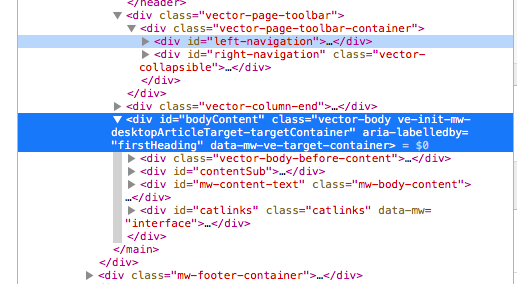


Y la división que contiene la información de la tabla:

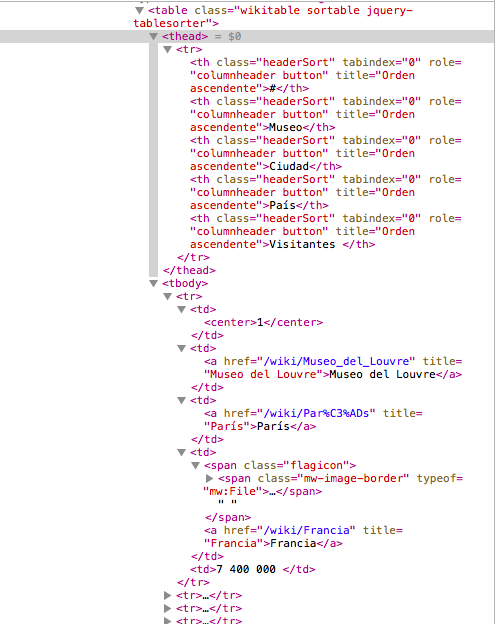

In [97]:
# ANALIZAR EL CÓDIGO HTML CON BEAUTIFUL SOUP

# Importar la biblioteca en su secuencia de comandos Python y crear un objeto Beautiful Soup:

# from bs4 import BeautifulSoup ==> En este caso no la importo porque ya la tengo importada de antes.

page_w = requests.get(URL)

soup_w = BeautifulSoup(page_w.content, "html.parser")

# Se crea un objeto Beautiful Soup que toma como entrada page.content, que es el contenido HTML extraido.
# El atributo .content evita problemas con la codificación de caracteres que sí que daría el .test.
# El argumento, "html.parser" garantiza que utilice el analizador adecuado para el contenido HTML.

Extraigo toda la información de la web buscando por el ID

In [98]:
# BUSCAR EN LA WEB ELEMENTOS POR SU ID QUE APARECE EN LA HTML:

results_w = soup_w.find(id="bodyContent")
print(results_w.prettify())

<div aria-labelledby="firstHeading" class="vector-body" data-mw-ve-target-container="" id="bodyContent">
 <div class="vector-body-before-content">
  <div class="mw-indicators">
  </div>
  <div class="noprint" id="siteSub">
   De Wikipedia, la enciclopedia libre
  </div>
 </div>
 <div id="contentSub">
  <div id="mw-content-subtitle">
  </div>
 </div>
 <div class="mw-body-content" id="mw-content-text">
  <div class="mw-content-ltr mw-parser-output" dir="ltr" lang="es">
   <table class="noprint plainlinks ambox ambox-content" style="">
    <tbody>
     <tr>
      <td class="ambox-image" width="40">
       <span class="mw-default-size" typeof="mw:File">
        <a class="mw-file-description" href="/wiki/Archivo:Ambox_outdated_serious.svg">
         <img alt="" class="mw-file-element" data-file-height="620" data-file-width="620" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Ambox_outdated_serious.svg/40px-Ambox_outdated_serious.svg.png" srcset="//uplo

Ahora decido extraer solo la información de la tabla por su identificador: __("table", class_="wikitable sortable")__.

Con __.prettify()__ imprimo la selección de la tabla teniendo en cuenta las posiciones de las divisiones:

In [99]:
# BUSCAR LOS ELEMNTOS QUE CONTIENE LA TABLA:

results_table = soup_w.find("table", class_="wikitable sortable")
print(results_table.prettify())

<table class="wikitable sortable">
 <tbody>
  <tr>
   <th>
    #
   </th>
   <th>
    Museo
   </th>
   <th>
    Ciudad
   </th>
   <th>
    País
   </th>
   <th>
    Visitantes
   </th>
  </tr>
  <tr>
   <td>
    <center>
     1
    </center>
   </td>
   <td>
    <a href="/wiki/Museo_del_Louvre" title="Museo del Louvre">
     Museo del Louvre
    </a>
   </td>
   <td>
    <a href="/wiki/Par%C3%ADs" title="París">
     París
    </a>
   </td>
   <td>
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <a class="mw-file-description" href="/wiki/Archivo:Flag_of_France_(1794%E2%80%931815,_1830%E2%80%931974).svg" title="Bandera de Francia">
       <img alt="Bandera de Francia" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29.svg/20px-Flag_of_France_%281794%E2%80%931815%2C_1830%E2%80%931974%29

### NOTA ACLARATOIRA: 
__Las tablas se organizan por filas:__ 
- __< thead > < tr >__ introduce la primera fila, que contiene el nombre de las __COLUMNAS__. A cada columna se accede con __< th__.
- __< tbody > < tr >__ introduce el resto de las filas, que contienen los __DATOS__. A cada dato se accede con __< td__.
                                                                                                       
### TENIEDO ESTO EN CUENTA: 
- 1.- Itinerando en la __TABLA__ por __<tr__ obtendré dos objetos: __*ENCABEZAMIENTO Y CUERPO*__.
- 2.- Itinerando en el __ENCABEZAMIENTO__ por __<th__ obtendré los __*NOMBRES DE LAS COLUMNAS*__.
- 3.- Itinerando en el __CUERPO__ por __<td__ obtendré los __*DATOS DE LA TABLA*__.



In [100]:
encabezados_final = []

for fila in results_table('tr')[0:]:
    # Obtener los encabezados
    if fila.find_all('th'):
        encabezados = fila.find_all('th')
        for encabezado in encabezados: 
            encabezados_final.append(encabezado.text.strip())
        print("Encabezados:")
        print(", ".join(encabezados_final))
        print()
    
    # Obtener los datos de cada fila
    else:
        datos = fila.find_all('td')
        #print(datos)

        # Obtener los datos individuales
        ranking = datos[0].text.strip()
        museo = datos[1].text.strip()
        ciudad = datos[2].text.strip()
        pais = datos[3].text.strip()
        visitantes = datos[4].text.strip()
        
        print("Ranking:", ranking)
        print("Museo:", museo)
        print("Ciudad:", ciudad)
        print("País:", pais)
        print("Visitantes/año:", visitantes)
        print()
    
 

Encabezados:
#, Museo, Ciudad, País, Visitantes

Ranking: 1
Museo: Museo del Louvre
Ciudad: París
País: Francia
Visitantes/año: 7 400 000

Ranking: 2
Museo: Museo Metropolitano de Arte
Ciudad: Nueva York
País: Estados Unidos
Visitantes/año: 7 006 859

Ranking: 3
Museo: Museo Británico
Ciudad: Londres
País: Reino Unido
Visitantes/año: 6 420 395

Ranking: 4
Museo: National Gallery de Londres
Ciudad: Londres
País: Reino Unido
Visitantes/año: 6 262 839

Ranking: 5
Museo: Museo Nacional del Palacio
Ciudad: Taipéi
País: Taiwán
Visitantes/año: 6 142 892

Ranking: 6
Museo: Museos Vaticanos
Ciudad: Roma
País: Ciudad del Vaticano
Visitantes/año: 6 066 649

Ranking: 7
Museo: Tate Modern
Ciudad: Londres
País: Reino Unido
Visitantes/año: 5 839 197

Ranking: 8
Museo: Galería Nacional de Arte
Ciudad: Washington D C
País: Estados Unidos
Visitantes/año: 4 261 391

Ranking: 9
Museo: Museo del Hermitage
Ciudad: San Petersburgo
País: Rusia
Visitantes/año: 4 119 103

Ranking: 10
Museo: Museo Nacional Centr

El resultado anterior no me convence porque los encabezados los he escrito yo a mano, pero no me ha utilizado los encabeados que he extraído de la propia tabla. 

- Corrijo código para conseguir que utilice los encabezados obtenidos. 
- Para ello creo una lista con los encabezados para que vayan acumulando los resutados y luego los pueda utilizar en el momento de imprimir. 
- Además creo listas para cada una de las variables de la tabla, que luego me servirán para crear mi dataframe.

In [101]:
encabezados_final = []
Ranking =[]
Museo =[]
Ciudad = []
Pais = []
Visitantes = []
for fila in results_table('tr')[0:]:
    # Obtener los encabezados
    if fila.find_all('th'):
        encabezados = fila.find_all('th')
        for encabezado in encabezados: 
            encabezados_final.append(encabezado.text.strip())
        print("Encabezados:")
        print(", ".join(encabezados_final))
        print()
    
    # Obtener los datos de cada fila
    else:
        datos = fila.find_all('td')
        #print(datos)

        # Obtener los datos individuales
        ranking = datos[0].text.strip()
        Ranking.append(ranking)
        museo = datos[1].text.strip()
        Museo.append(museo)
        ciudad = datos[2].text.strip()
        Ciudad.append(ciudad)
        pais = datos[3].text.strip()
        Pais.append(pais)
        visitantes = datos[4].text.strip()        
        Visitantes.append(visitantes)
        
        print(encabezados_final[0]+":",ranking)
        print(encabezados_final[1]+":",museo)
        print(encabezados_final[2]+":",ciudad)
        print(encabezados_final[3]+":",pais)
        print(encabezados_final[4]+":",visitantes)
        print()

Encabezados:
#, Museo, Ciudad, País, Visitantes

#: 1
Museo: Museo del Louvre
Ciudad: París
País: Francia
Visitantes: 7 400 000

#: 2
Museo: Museo Metropolitano de Arte
Ciudad: Nueva York
País: Estados Unidos
Visitantes: 7 006 859

#: 3
Museo: Museo Británico
Ciudad: Londres
País: Reino Unido
Visitantes: 6 420 395

#: 4
Museo: National Gallery de Londres
Ciudad: Londres
País: Reino Unido
Visitantes: 6 262 839

#: 5
Museo: Museo Nacional del Palacio
Ciudad: Taipéi
País: Taiwán
Visitantes: 6 142 892

#: 6
Museo: Museos Vaticanos
Ciudad: Roma
País: Ciudad del Vaticano
Visitantes: 6 066 649

#: 7
Museo: Tate Modern
Ciudad: Londres
País: Reino Unido
Visitantes: 5 839 197

#: 8
Museo: Galería Nacional de Arte
Ciudad: Washington D C
País: Estados Unidos
Visitantes: 4 261 391

#: 9
Museo: Museo del Hermitage
Ciudad: San Petersburgo
País: Rusia
Visitantes: 4 119 103

#: 10
Museo: Museo Nacional Centro de Arte Reina Sofía
Ciudad: Madrid
País: España
Visitantes: 3 646 598

#: 11
Museo: Somerset H

Ahora ya tengo los resultados conforme los estaba buscando. 

Procedo a crear el dataframe a partir de las listas que he conseguido en la celda anterior. 


In [103]:
# Creo el Dataframe directamente desde las listas que he construido en el apartado anterior

df_museos = pd.DataFrame({
    encabezados_final[0]: Ranking,
    encabezados_final[1]: Museo,
    encabezados_final[2]: Ciudad,
    encabezados_final[3]: Pais,
    encabezados_final[4]: Visitantes
})
df_museos

,#,Museo,Ciudad,País,Visitantes
0,1,Museo del Louvre,París,Francia,7 400 000
1,2,Museo Metropolitano de Arte,Nueva York,Estados Unidos,7 006 859
2,3,Museo Británico,Londres,Reino Unido,6 420 395
3,4,National Gallery de Londres,Londres,Reino Unido,6 262 839
4,5,Museo Nacional del Palacio,Taipéi,Taiwán,6 142 892
...,...,...,...,...,...
95,96,Museo Nacional de Cracovia,Cracovia,Polonia,770 714
96,97,Museo de Historia del Arte de Viena,Viena,Austria,769 119
97,98,Instituto de Artes de Minneapolis,Minneapolis,Estados Unidos,767 590
98,99,Galería Renwick,Washington D C,Estados Unidos,765 000


<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# Ejercicio 2
Documenta en un Word tu conjunto de datos generado con la información que tienen los distintos archivos de Kaggle.
Per saber més
A manera d'exemple del que es demana pots consultar aquest enllaç:
->https://www.kaggle.com/datasets/vivovinco/20212022-football-team-stats.



## Museos de arte más visitados

### About Dataset


#### CONTEXT:
Este dataset contiene datos sobre el número de visitantes/año de los 100 museos más visitados del mundo.

#### CONTENT:
100 filas y cinco columnas.

A continuación se realiza la descripción de las colunmnas:

- #: Ranking en el número de visitas.
- Museo: Nombre del museo.
- Ciudad: Ciudad en la que se encuentra el museo.
- País: País al que pertenece el museo.
- Visitantes: Número de visitantes por año. 

#### DATA SOURCE: 
- Origen: Wikipedia.
- Web: https://es.wikipedia.org/wiki/Anexo:Museos_de_arte_más_visitados
- Fecha de extracción: 12/02/2024



<font color='blue'>__.........................................................................................................................................................................................................................................................................__

# Ejercicio 3
Elige una página web que quieras y realiza web scraping mediante la librería Selenium primero y Scrapy después.


Como he indicado más arriba, no puedo aplicar Selenium porque no he conseguido cargarlo en mi Mac.

He elejido la página de wikipwedia sobre los premios Cervantes de literatura iberoamericana.

In [105]:
# HACER LA SOLICITUD A LA URL

# import requests # No la importo en esta ocasión porque la tengo importada de antes

URL = "https://es.wikipedia.org/wiki/Premio_Miguel_de_Cervantes"
page_cervantes = requests.get(URL)

print(page_cervantes.text)

# Este código emite una solicitud HTTP GET a la URL proporcionada. 
# Recupera los datos HTML que el servidor envía y almacena esos datos en un objeto Python.

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Premio Miguel de Cervantes - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-featu

In [106]:
# ANALIZAR EL CÓDIGO HTML CON BEAUTIFUL SOUP

# Importar la biblioteca en su secuencia de comandos Python y crear un objeto Beautiful Soup:

# from bs4 import BeautifulSoup # No la importo en esta ocasión porque la tengo importada de antes

page_cervantes = requests.get(URL)

soup_cervantes = BeautifulSoup(page_cervantes.content, "html.parser")

# Se crea un objeto Beautiful Soup que toma como entrada page.content, que es el contenido HTML extraido.
# El atributo .content evita problemas con la codificación de caracteres que sí que daría el .test.
# El argumento, "html.parser" garantiza que utilice el analizador adecuado para el contenido HTML.

Selecciono solo la información de la tabla para ir directamente a los datos que me interesan:

In [107]:
# BUSCAR EL O LOS ELEMENTOS QUE CONTIENEN LOS DATOS DE LA TABLA:
# En este caso el elemento que lo contiene todo es <"table class="sortable wikitable"> (no hay ID identificador).
# Hay que buscar en la página de Beautiful Soup cómo es la sintaxis correcta para extraer los resultados

results_cervantes = soup_cervantes.find("table", class_="sortable wikitable")
print(results_cervantes.prettify())


<table border="0" class="sortable wikitable" style="background:#fff;width:100%;margin:0;text-align: center">
 <tbody>
  <tr>
   <th style="background:Lavender; color:Black">
    Año
   </th>
   <th style="background:Lavender; color:Black">
    Autor
   </th>
   <th style="background:Lavender; color:Black">
    Nacionalidad
   </th>
   <th style="background:Lavender; color:Black">
    Referencias
   </th>
  </tr>
  <tr>
   <td>
    1976
   </td>
   <td>
    <a href="/wiki/Jorge_Guill%C3%A9n" title="Jorge Guillén">
     Jorge Guillén
    </a>
    <br/>
    <small>
     (1893-1984)
    </small>
   </td>
   <td>
    <a href="/wiki/Espa%C3%B1a" title="España">
     España
    </a>
   </td>
   <td>
    <sup class="reference separada" id="cite_ref-6">
     <a href="#cite_note-6">
      <span class="corchete-llamada">
       [
      </span>
      6
      <span class="corchete-llamada">
       ]
      </span>
     </a>
    </sup>
    ​
   </td>
  </tr>
  <tr>
   <td>
    1977
   </td>
   <td>
 

Aplico el código para conseguir: 
- Los datos de los encabezados de cada columna.
- Los datos de los elementos de cada fila.
- Listas que me acumulen los años, autores y países para poder general luego mi dataframe

In [111]:
encabezados_cervantes = []
Año =[]
Autor =[]
Pais = []

for fila in results_cervantes('tr')[0:]:
    # Obtener los encabezados
    if fila.find_all('th'):
        columnas = fila.find_all('th')
        for columna in columnas: 
            encabezados_cervantes.append(columna.text.strip())
        print("Nombre columnas:")
        print(", ".join(encabezados_cervantes))
        print()
    
    # Obtener los datos de cada fila
    else:
        datos_cervantes = fila.find_all('td')
     

        # Obtener los datos individuales
        año = datos_cervantes[0].text.strip()
        Año.append(año)
        autor = datos_cervantes[1].text.strip()
        Autor.append(autor)
        pais = datos_cervantes[2].text.strip()
        Pais.append(pais)
      
        
        print(encabezados_cervantes[0]+":",año)
        print(encabezados_cervantes[1]+":",autor)
        print(encabezados_cervantes[2]+":",pais)
        
        print()

Nombre columnas:
Año, Autor, Nacionalidad, Referencias

Año: 1976
Autor: Jorge Guillén(1893-1984)
Nacionalidad: España

Año: 1977
Autor: Alejo Carpentier(1904-1980)
Nacionalidad: Cuba

Año: 1978
Autor: Dámaso Alonso(1898-1990)
Nacionalidad: España

Año: 1979(ex aequo)
Autor: Jorge Luis Borges(1899-1986)[9]​
Nacionalidad: Argentina

Año: Gerardo Diego(1896-1987)[11]​
Autor: España
Nacionalidad: [12]​

Año: 1980
Autor: Juan Carlos Onetti(1909-1994)
Nacionalidad: Uruguay

Año: 1981
Autor: Octavio Paz(1914-1998)
Nacionalidad: México

Año: 1982
Autor: Luis Rosales(1910-1992)
Nacionalidad: España

Año: 1983
Autor: Rafael Alberti(1902-1999)
Nacionalidad: España

Año: 1984
Autor: Ernesto Sabato(1911-2011)
Nacionalidad: Argentina

Año: 1985
Autor: Gonzalo Torrente Ballester(1910-1999)
Nacionalidad: España

Año: 1986
Autor: Antonio Buero Vallejo(1916-2000)
Nacionalidad: España

Año: 1987
Autor: Carlos Fuentes(1928-2012)
Nacionalidad: México

Año: 1988
Autor: María Zambrano(1904-1991)
Nacionalida

Una vez que compruebo que los datos han sido extraidos en la forma que yo buscaba, procedo a construir mi dataframe partiendo de las listas Año, Autor y Pais que creado en el apartado anterior.

In [109]:
# Creo el Dataframe directamente desde las listas que he construido en el apartado anterior

df_cervantes = pd.DataFrame({
    encabezados_cervantes[0]: Año,
    encabezados_cervantes[1]: Autor,
    encabezados_cervantes[2]: Pais,    
})
df_cervantes

,Año,Autor,Nacionalidad
0,1976,Jorge Guillén(1893-1984),España
1,1977,Alejo Carpentier(1904-1980),Cuba
2,1978,Dámaso Alonso(1898-1990),España
3,1979(ex aequo),Jorge Luis Borges(1899-1986)[9]​,Argentina
4,Gerardo Diego(1896-1987)[11]​,España,[12]​
5,1980,Juan Carlos Onetti(1909-1994),Uruguay
6,1981,Octavio Paz(1914-1998),México
7,1982,Luis Rosales(1910-1992),España
8,1983,Rafael Alberti(1902-1999),España
9,1984,Ernesto Sabato(1911-2011),Argentina


Al obtener la tabla observo que la fila nº 4 me da un error, porque el ao 1979 se otrogaron dos premios a dos autores, uno está en la fila 3 y el otro en la fila 4, pero las dos celdas del año estan combinadas en una sola. 
Por este motivo habría que investigar la forma de arreglaro y que aparecier __1979(ex aequo)__ en ambas filas. Necesitaría investigar la forma de arreglarlo, pero por motivos de tiempo, lo dejo para otra ocasión.  